In [7]:
###We will expore some of the common factors contributing to employees leaving the company !

import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier ###RandomForest
from sklearn import svm   ###SVM
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

%matplotlib inline
## We have imported some of the important ML libraries to build our predictive model; 
#('RandomForest, SVM,  K Nearest Neighbor, Accuracy Score, Gaussian, Naive Bayes')



C:\Users\sakri18\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
df=pd.read_csv("C:/Users/sakri18/Downloads/HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
##Target Variable;
y=df['left']
print('Total Number of Records',df.shape[0]) ### We have a total of 14999 records

Total Number of Records 14999


In [15]:
##Explore the Data;
df.isnull().values.ravel().sum()

0

In [18]:
df.dtypes ###Our Target Variable 'left' is supposedly int64 data type.
df.salary.unique() ### Three Levels in the Class 'Low', 'Medium', 'High'


array(['low', 'medium', 'high'], dtype=object)

In [25]:
df.salary.replace({'low':1,'medium':2,'high':3},inplace=True) ## Replacing the salary columns with appropriate levels

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [28]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


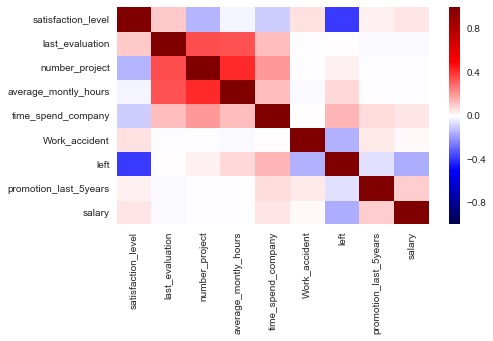

In [37]:
fig=plt.figure(figsize=(7,4))
corr1=df.corr()
sns.heatmap(corr1,annot=False,cmap='seismic',
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)

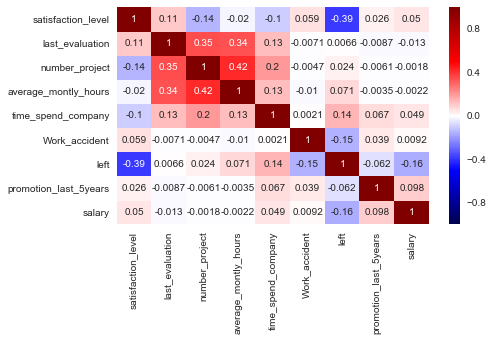

In [38]:
fig=plt.figure(figsize=(7,4))
corr1=df.corr()
sns.heatmap(corr1,annot=True,cmap='seismic',
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)


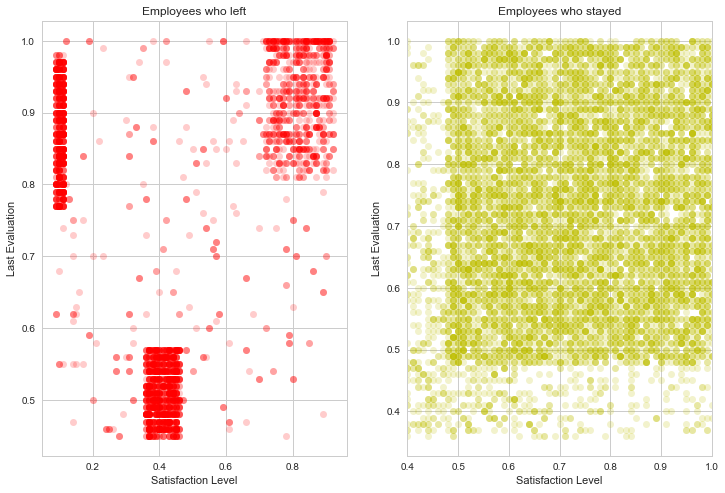

In [51]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(df.satisfaction_level[df.left==1],df.last_evaluation[df.left==1],'ro',alpha=0.2)
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.title('Employees who left')

plt.subplot(1,2,2)
plt.plot(df.satisfaction_level[df.left==0],df.last_evaluation[df.left==0],'yo',alpha=0.2)
plt.xlim([0.4,1])
plt.ylabel('Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.title('Employees who stayed')

In [57]:
#So, there are hree clusters for those employees wwho left;
#Those who were appreciated enough for their job; but were generally unhappy may be with the quality of work or in some sense they might be overqualified;
## Second Category is those who are satisfied with the job and who are recognized as well
## The last one are those who are neither satisified nor they are appreciated and chances are they would leave the company soon, probably even fired.
## They are called as bad matches.
## Another category is the happy bunch who have high satisfaction and are evaluated well

from sklearn.cluster import KMeans
kmeans_df=df[df.left==1].drop([u'number_project',u'average_montly_hours',u'time_spend_company',
                               u'Work_accident',u'left',u'promotion_last_5years',u'sales',u'salary'],axis=1)
###Filtering out the data to be prepared for K-means

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [72]:
kmeans=KMeans(n_clusters=3, random_state=0).fit(kmeans_df)
print(kmeans.cluster_centers_) ### Printing out the Cluster Centres!
left=df[df.left==1]
left['label']=kmeans.labels_

[[ 0.80851586  0.91170931]
 [ 0.11115466  0.86930085]
 [ 0.41014545  0.51698182]]


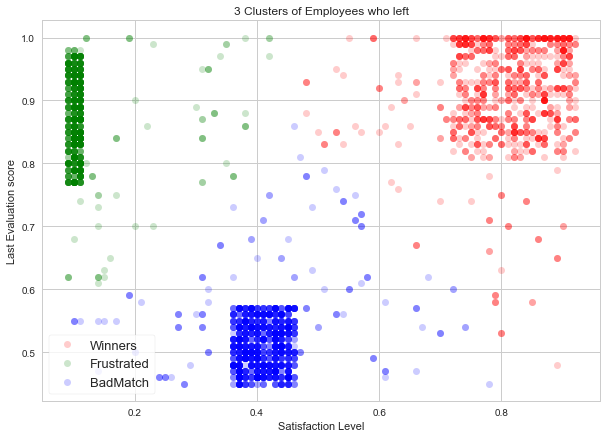

In [79]:
plt.figure(figsize=(10,7))
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation score')
plt.title('3 Clusters of Employees who left')
plt.plot(left.satisfaction_level[left.label==0],left.last_evaluation[left.label==0],'o',alpha=0.2,color='r')
plt.plot(left.satisfaction_level[left.label==1],left.last_evaluation[left.label==1],'o',alpha=0.2,color='g')
plt.plot(left.satisfaction_level[left.label==2],left.last_evaluation[left.label==2],'o',alpha=0.2,color='b')
plt.legend(['Winners','Frustrated','BadMatch'],loc='best',fontsize=13,frameon=True)

In [83]:
winners=left[left.label==0] ### Seperating out the three categories
frustrated=left[left.label==1]
bad_match=left[left.label==2]


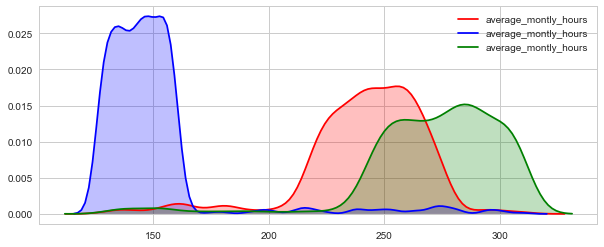

In [90]:
plt.figure(figsize=(10,4))
sns.kdeplot(winners.average_montly_hours,color='r',shade=True)
sns.kdeplot(bad_match.average_montly_hours,color='b',shade=True)
sns.kdeplot(frustrated.average_montly_hours,color='g',shade=True)

###It seems that the frustrated group works by far the longest hours (possibly and understandably thier reason to be frustrated)
### The winners also work for long hours, and those who are bad match work significantly less hours.

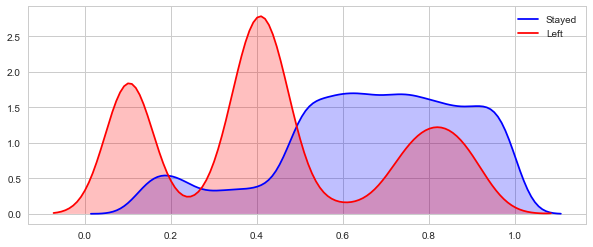

In [93]:
## We will now visualize the distribution of several features of interest using a histogram or kernal density estimate plot
fig=plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['left']==0),'satisfaction_level'],color='b',shade=True,label='Stayed')
ax=sns.kdeplot(df.loc[(df['left']==1),'satisfaction_level'],color='r',shade=True,label='Left')

###There are other factors contributing to employee attrition as well; apart from the satisfaction level

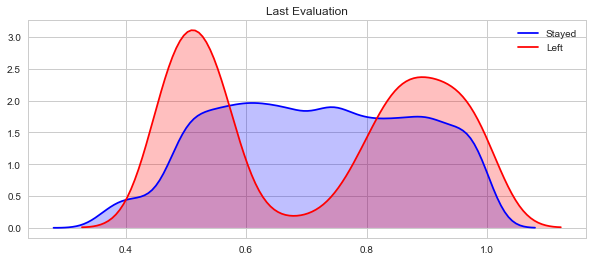

In [96]:
### Employee Left/Stayed vs Last_Evaluation; \\ Kernel Density Estimate Plot and Histogram to look at each feature;
fig=plt.figure(figsize=(10,4),) #### Using the Seaborn Visualization
ax=sns.kdeplot(df.loc[(df['left']==0),'last_evaluation'], color='b', shade=True, label='Stayed')
ax=sns.kdeplot(df.loc[(df['left']==1),'last_evaluation'], color='r', shade=True, label='Left')
plt.title('Last Evaluation')
### Looks like people who leave the company either did pretty bad or good in their last performance evaluation. 
#There are not many medium level people who were ranked betwween 0.6 to 0.8 left the company;
##(Ball Park) in the middle who still work in the country

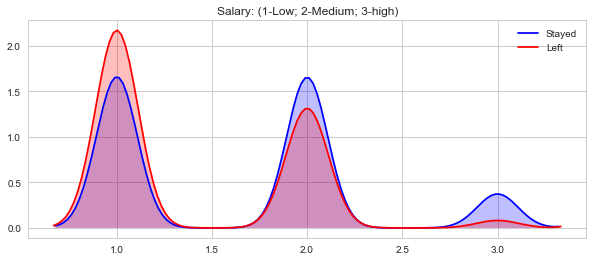

In [100]:
fig=plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['left']==0),'salary'], color='b', shade=True, label='Stayed')
ax=sns.kdeplot(df.loc[(df['left']==1),'salary'], color='r', shade=True, label='Left')
plt.title('Salary: (1-Low; 2-Medium; 3-high)')
####We can infer a trend; the higher the salary, lower the chances of employee leaving;


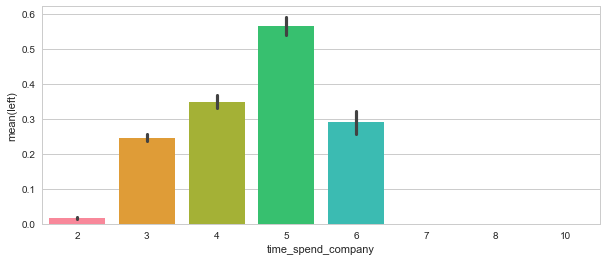

In [101]:
fig=plt.figure(figsize=(10,4))
sns.barplot(x='time_spend_company', y='left', data=df, saturation=1)
##Majority of people leave around the 5th year !

In [108]:
#Part3: Machine Learning;
features=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','number_project']]
df1= features
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df1,y,random_state=0,test_size=0.25)

In [111]:
print('Training Set Volume:', X_train.shape[0])
print('Testing Set Volume:',X_test.shape[0])

Training Set Volume: 11249
Testing Set Volume: 3750


In [113]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [114]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
accuracy_score(y_test,logreg.predict(X_test)) ##78.93%

0.78933333333333333

In [119]:
## Create Naive Bayes Classifier;
clf_gb=GaussianNB()
clf_gb.fit(X_train,y_train)
predicts_gb=clf_gb.predict(X_test)
print("GB Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(y_test,predicts_gb)) ##82.85%

GB Accuracy Rate, which is calculated by accuracy_score() is: 0.828533


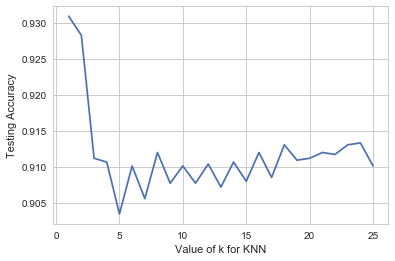

In [132]:
### Building a Model using a K-NN Classifier; ###For Range of 'K' values running from 1 to 26 we build a K-NN classifier;
k_range = range(1,26)
scores=[]
for k in k_range:
     knn=KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train,y_train)
     y_pred=knn.predict(X_test)
     scores.append(accuracy_score(y_test,y_pred))
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [136]:
clf_svm=svm.SVC(kernel='rbf',probability=False) #######91.6 %
clf_svm.fit(X_train, y_train)
predicts_svm=clf_svm.predict(X_test)
print("SVM Accuracy Rate, which is calculated by accuracy_score() is: %f" %accuracy_score(y_test, predicts_svm))

SVM Accuracy Rate, which is calculated by accuracy_score() is: 0.916000


In [142]:
###Random Forest Classifier;
clf_rf = RandomForestClassifier(n_estimators=10,min_samples_split=2,max_depth=30) ###n_estimators is the number of trees to grow; 
### min_samples_split is the number of samples considered at each split
clf_rf.fit(X_train,y_train)
accuracy_rf=clf_rf.score(X_test,y_test)
print("Random Forest Accuracy Rate, which is calculated by accuracy_score() is %f" %accuracy_rf) ####95.25%

Random Forest Accuracy Rate, which is calculated by accuracy_score() is 0.952533


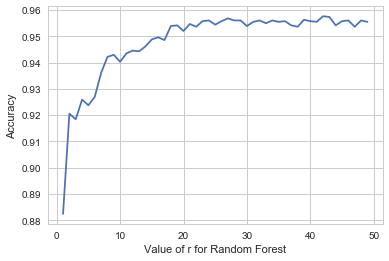

In [144]:
### The Random Forest (Ensembling) for different depth;

max_depth = range(1,50)
scores=[]
for r in max_depth:
    clf_rf=RandomForestClassifier(n_estimators=10,min_samples_split=2,max_depth=r)
    clf_rf.fit(X_train,y_train)
    y_pred=clf_rf.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(max_depth,scores)
plt.xlabel('Value of r for Random Forest')
plt.ylabel('Accuracy')

In [146]:
###Neural Networks
from sklearn.neural_network import MLPRegressor
clf=MLPRegressor(max_iter=100, learning_rate='adaptive',hidden_layer_sizes=200)
clf.fit(X_train,y_train)
print("MLPR Accuracy rate, which is calculated by accuracy score() is: %f" %accuracy_score(y_test, predicts_svm))

MLPR Accuracy rate, which is calculated by accuracy score() is: 0.916000
